In [1]:
import pandas as pd
import jsonstat as jstat
from dfply import *
import matplotlib.pyplot as plt

base_url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/'
bprod_url = 'nrg_109a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_en=B_100100&'
bcons_url = 'nrg_100a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_nrg=B_100900&'
bcons_res_url = 'nrg_107a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_nrg=B_100900&'

# specify country, time here
country = ['HU','EE','PL','SK','SI','UK','ES','PT','IT','DE',\
           'FR','IE','AT','BG','RO','DK','SE','FI','MT','CY','LT','LV','EL','HR','CZ','NL','BE','LU']
year = '2016'
url = "".join(list(map(lambda t: "geo={}&".format(t), country)))[:-1]

prod_url = base_url + bprod_url + url
print(prod_url)

cons_url = base_url + bcons_url + url
print(cons_url)

cons_res_url = base_url + bcons_res_url + url
print(cons_res_url)

c:\users\bence\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nrg_109a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_en=B_100100&geo=HU&geo=EE&geo=PL&geo=SK&geo=SI&geo=UK&geo=ES&geo=PT&geo=IT&geo=DE&geo=FR&geo=IE&geo=AT&geo=BG&geo=RO&geo=DK&geo=SE&geo=FI&geo=MT&geo=CY&geo=LT&geo=LV&geo=EL&geo=HR&geo=CZ&geo=NL&geo=BE&geo=LU
http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nrg_100a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_nrg=B_100900&geo=HU&geo=EE&geo=PL&geo=SK&geo=SI&geo=UK&geo=ES&geo=PT&geo=IT&geo=DE&geo=FR&geo=IE&geo=AT&geo=BG&geo=RO&geo=DK&geo=SE&geo=FI&geo=MT&geo=CY&geo=LT&geo=LV&geo=EL&geo=HR&geo=CZ&geo=NL&geo=BE&geo=LU
http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nrg_107a?precision=1&sinceTimePeriod=2000&unit=KTOE&indic_nrg=B_100900&geo=HU&geo=EE&geo=PL&geo=SK&geo=SI&geo=UK&geo=ES&geo=PT&geo=IT&geo=DE&geo=FR&geo=IE&geo=AT&geo=BG&geo=RO&geo=DK&geo=SE&geo=FI&geo=MT&geo=CY&geo=LT&geo=LV&geo=EL&geo=HR&geo=CZ&geo=NL&geo=BE&geo=LU


In [2]:
prod_data = jstat.from_url(prod_url)
print(prod_data)
prod_df = prod_data.to_data_frame('time', content='id')
prod_df.reset_index(level=0, inplace=True)
prod_df.head()

name:   'Primary production - all products - annual data'
label:  'Primary production - all products - annual data'
size: 17064
+-----+----------+----------+------+------+
| pos | id       | label    | size | role |
+-----+----------+----------+------+------+
| 0   | unit     | unit     | 1    |      |
| 1   | product  | product  | 39   |      |
| 2   | indic_en | indic_en | 1    |      |
| 3   | geo      | geo      | 28   |      |
| 4   | time     | time     | 17   |      |
+-----+----------+----------+------+------+


,time,unit,product,indic_en,geo,Value
0,2000,KTOE,0000,B_100100,AT,9768.4
1,2001,KTOE,0000,B_100100,AT,9774.4
2,2002,KTOE,0000,B_100100,AT,9807.3
3,2003,KTOE,0000,B_100100,AT,9457.3
4,2004,KTOE,0000,B_100100,AT,9832.7


In [3]:
cons_data = jstat.from_url(cons_url)
print(cons_data)
cons_df = cons_data.to_data_frame('time', content='id')
cons_df.reset_index(level=0, inplace=True)
cons_df.head()

name:   'Simplified energy balances - annual data'
label:  'Simplified energy balances - annual data'
size: 4261
+-----+-----------+-----------+------+------+
| pos | id        | label     | size | role |
+-----+-----------+-----------+------+------+
| 0   | unit      | unit      | 1    |      |
| 1   | product   | product   | 9    |      |
| 2   | indic_nrg | indic_nrg | 1    |      |
| 3   | geo       | geo       | 28   |      |
| 4   | time      | time      | 17   |      |
+-----+-----------+-----------+------+------+


,time,unit,product,indic_nrg,geo,Value
0,2000,KTOE,0000,B_100900,AT,29022.7
1,2001,KTOE,0000,B_100900,AT,30527.6
2,2002,KTOE,0000,B_100900,AT,30824.1
3,2003,KTOE,0000,B_100900,AT,32458.2
4,2004,KTOE,0000,B_100900,AT,33242.2


In [4]:
cons_res_data = jstat.from_url(cons_res_url)
cons_res_df = cons_res_data.to_data_frame('time', content='id')
cons_res_df.reset_index(level=0,inplace=True)
cons_res_df = cons_res_df[~cons_res_df['product'].isin(['5500','5540','5546','5547','5548','5549'])]
cons_res_df.head()

,time,unit,product,indic_nrg,geo,Value
476,2000,KTOE,5510,B_100900,AT,3597.2
477,2001,KTOE,5510,B_100900,AT,3478.5
478,2002,KTOE,5510,B_100900,AT,3458.9
479,2003,KTOE,5510,B_100900,AT,2856
480,2004,KTOE,5510,B_100900,AT,3161


In [5]:
prod_df['product'].unique()

array(['0000', '2115', '2116', '2117', '2118', '2210', '2310', '2410',
       '3105', '3106', '3192', '3193', '4100', '5100', '5510', '5520',
       '5532', '5534', '5535', '5541', '55411', '55412', '55413', '55414',
       '55415', '55416', '5542', '55421', '55422', '55423', '55425',
       '55431', '55432', '5546', '5547', '5548', '5549', '5550', '7100'],
      dtype=object)

In [6]:
cons_df['RES'] = False
cons_df.loc[cons_df['product'] == '5500','RES'] = True

cons_res_df['RES'] = True

prod_df['RES'] = False
prod_df.loc[prod_df['product'].isin(['5510','5520','5530']),'RES'] = True

cons_df = cons_df[cons_df['RES']==False].append(cons_res_df)

cons_df.head()

,time,unit,product,indic_nrg,geo,Value,RES
0,2000,KTOE,0000,B_100900,AT,29022.7,False
1,2001,KTOE,0000,B_100900,AT,30527.6,False
2,2002,KTOE,0000,B_100900,AT,30824.1,False
3,2003,KTOE,0000,B_100900,AT,32458.2,False
4,2004,KTOE,0000,B_100900,AT,33242.2,False


In [7]:
data_df = prod_df.drop('indic_en',axis='columns').assign(ind = 'prod').append(cons_df.drop('indic_nrg', axis='columns').assign(ind = 'cons'))
data_df.head()

,time,unit,product,geo,Value,RES,ind
0,2000,KTOE,0000,AT,9768.4,False,prod
1,2001,KTOE,0000,AT,9774.4,False,prod
2,2002,KTOE,0000,AT,9807.3,False,prod
3,2003,KTOE,0000,AT,9457.3,False,prod
4,2004,KTOE,0000,AT,9832.7,False,prod


In [8]:
print(prod_df['product'].unique())
print(cons_df['product'].unique())

['0000' '2115' '2116' '2117' '2118' '2210' '2310' '2410' '3105' '3106'
 '3192' '3193' '4100' '5100' '5510' '5520' '5532' '5534' '5535' '5541'
 '55411' '55412' '55413' '55414' '55415' '55416' '5542' '55421' '55422'
 '55423' '55425' '55431' '55432' '5546' '5547' '5548' '5549' '5550' '7100']
['0000' '2000' '3000' '4000' '5100' '5200' '6000' '7200' '5510' '5520'
 '5532' '5534' '5535' '5541' '5542' '55431' '5544' '5545' '5550']


In [9]:
# Treating data_df

data_df = data_df[(data_df['product'].str.len() <= 4) | (data_df['product'] == '55431')].copy()

data_df['lv3'] = data_df['product'].str[:3]
data_df['lv2'] = data_df['product'].str[:2]
data_df['lv1'] = data_df['product'].str[:1]

data_df['category'] = data_df['lv1']
data_df.loc[data_df['lv1'] == '5','category'] = data_df[data_df['lv1'] == '5']['lv3']
data_df.loc[data_df['product']=='55431','category'] = '55431'
data_df.head()

,time,unit,product,geo,Value,RES,ind,lv3,lv2,lv1,category
0,2000,KTOE,0000,AT,9768.4,False,prod,000,00,0,0
1,2001,KTOE,0000,AT,9774.4,False,prod,000,00,0,0
2,2002,KTOE,0000,AT,9807.3,False,prod,000,00,0,0
3,2003,KTOE,0000,AT,9457.3,False,prod,000,00,0,0
4,2004,KTOE,0000,AT,9832.7,False,prod,000,00,0,0


In [10]:
pie_data = data_df[(data_df['time'] == year) & (data_df['category']!='0')].copy()
pie_data['Value'] = pd.to_numeric(pie_data['Value'], errors="coerce")
pie_data = (pie_data >> group_by('geo','category','ind') >> summarize(total = X.Value.sum()))

# lv2['category'] = lv2['product']
# lv2.loc[(lv2['Value'] / total_sum) < 0.05,'category'] = 'Other'

pie_data.sort_values(by=['total'],ascending=False).head()

,ind,category,geo,total
122,cons,3,DE,108798.3
271,prod,510,FR,104005.6
270,cons,510,FR,104005.6
120,cons,2,DE,77226.6
266,cons,3,FR,75185.0


In [11]:
pie_data['category'].unique()

array(['2', '3', '4', '510', '520', '551', '552', '553', '554', '55431',
       '555', '6', '7'], dtype=object)

In [12]:
# translation
### Coal == Solid fuels
### Oil == Petroleum products

trans = {
    "2": "Solid (e.g. coal)", 
    "3": "Oil",
    "4": "Gas",
    "510": "Nuclear",
    "554": "Biomass",
    "552": "Wind",
    "553": "Solar",
    "551": "Hydro",
    "55431": "Renewable waste",
    "555": "Geothermal",
    "520": "Derived heat",
    "6": "Electricity",
    "7": "Waste"
}

def trans_(x):
    try:
        return trans[x]
    except KeyError:
        return 'Other'

pie_data['cn'] = pie_data['category'].apply(lambda x: trans_(x))

In [13]:
pie_data[pie_data['geo'] == "EE"]
# pie_data.geo.unique()

,ind,category,geo,total,cn
168,cons,2,EE,3796.8,Solid (e.g. coal)
169,prod,2,EE,3146.0,Solid (e.g. coal)
170,cons,3,EE,1132.4,Oil
171,prod,3,EE,0.0,Oil
172,cons,4,EE,428.3,Gas
173,prod,4,EE,0.0,Gas
174,cons,510,EE,0.0,Nuclear
175,prod,510,EE,0.0,Nuclear
176,cons,520,EE,0.0,Derived heat
177,cons,551,EE,3.0,Hydro


AT - 0.3567250253209037
BE - 0.2543323725178934
BG - 0.6182480141218006
CY - 0.05273285568065507
CZ - 0.6482495838037465
DE - 0.3547393025837446
DK - 0.8364788538366166
EE - 0.740789579480582
EL - 0.27844902929712584
ES - 0.2761168742091315
FI - 0.5007452296636068
FR - 0.5187372158542704
HR - 0.5136230736076974
HU - 0.4402057203323892
IE - 0.27854530268023736
IT - 0.21277703930069486
LT - 0.22499289166903613
LU - 0.03285758536062332
LV - 0.5567567567567567
MT - 0.024514529679107562
NL - 0.5779139494933673
PL - 0.6616881667812472
PT - 0.2533506417585818
RO - 0.7728404815766977
SE - 0.6864955556638881
SI - 0.5252758569957333
SK - 0.37433831990794014
UK - 0.62638671875


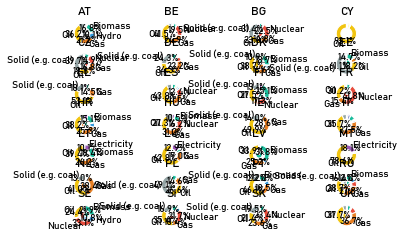

In [14]:
plt.rcParams["font.family"] = "Bahnschrift"

fig, ax = plt.subplots(7,4)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(top=0.92)
size = 0.45

import math

# defines sorter

sorter = ["Solid (e.g. coal)","Oil","Gas","Nuclear","Derived heat",\
          "Hydro","Wind","Solar","Biomass","Renewable waste","Geothermal","Electricity","Waste"]

categories = sorter

pie_data['cn'] = pie_data['cn'].astype('category')
pie_data['cn'].cat.set_categories(sorter, inplace=True)

for i, ctr in enumerate(pie_data['geo'].unique()):
    pos_x = i % 4
    pos_y = math.floor(i / 4)
    
    cmap = plt.get_cmap("tab20")
#     outer_colors = cmap(np.arange(len(categories)+1))
    outer_colors = ["#95A5A6","#F1C40F","#E67E22","#E74C3C","#FD5200",\
                    "#3498DB","#BBDEF0","#FFFD77","#1ABC9C","#2ECC71","#4357AD","#9B59B6","#34495E"]
    
    def pct_f(pct):
        if pct >= 10:
            return '%1.1f%%' % pct
        else:
            return ''
    
    prod = pie_data[(pie_data['geo'] == ctr) & (pie_data['ind'] == 'prod')].groupby(['cn']).agg({"total":"sum"}).reset_index()
    for cat in categories:
        if cat not in prod['cn'].unique():
            prod = prod.append(pd.Series([cat,0], index=['cn', 'total']), ignore_index=True)
    prod = prod.sort_values(by=['cn'])
#     print(prod)

    prod['perc'] = prod['total'].apply(lambda x: x / prod['total'].sum())
    prod['labs'] = prod.apply(lambda x: x['cn'] if x['perc'] >= 0.1 else '', axis=1)
    
    cons = pie_data[(pie_data['geo'] == ctr) & (pie_data['ind'] == 'cons')].groupby(['cn']).agg({"total":"sum"}).reset_index()
    for cat in categories:
        if cat not in cons['cn'].unique():
            cons = cons.append([cat,0])
    cons = cons.sort_values(by=['cn'])
#     print(cons)
    
    cons['perc'] = cons['total'].apply(lambda x: x / cons['total'].sum())
    cons['labs'] = cons.apply(lambda x: x['cn'] if x['perc'] >= 0.1 else '', axis=1)
    
    p_c = prod['total'].sum() / cons['total'].sum()
    print("{} - {}".format(ctr, p_c))
    
    ax[pos_y, pos_x].pie(prod['total'], radius=p_c * (1-size), colors=outer_colors,
       wedgeprops=dict(width=p_c * (1-size), edgecolor='w'), pctdistance=0.75, startangle=90)

    ax[pos_y, pos_x].pie(cons['total'], labels=cons['labs'], radius=1, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'), autopct=pct_f, pctdistance=0.75, startangle=90)

    ax[pos_y, pos_x].set(aspect="equal", title='{}'.format(ctr))

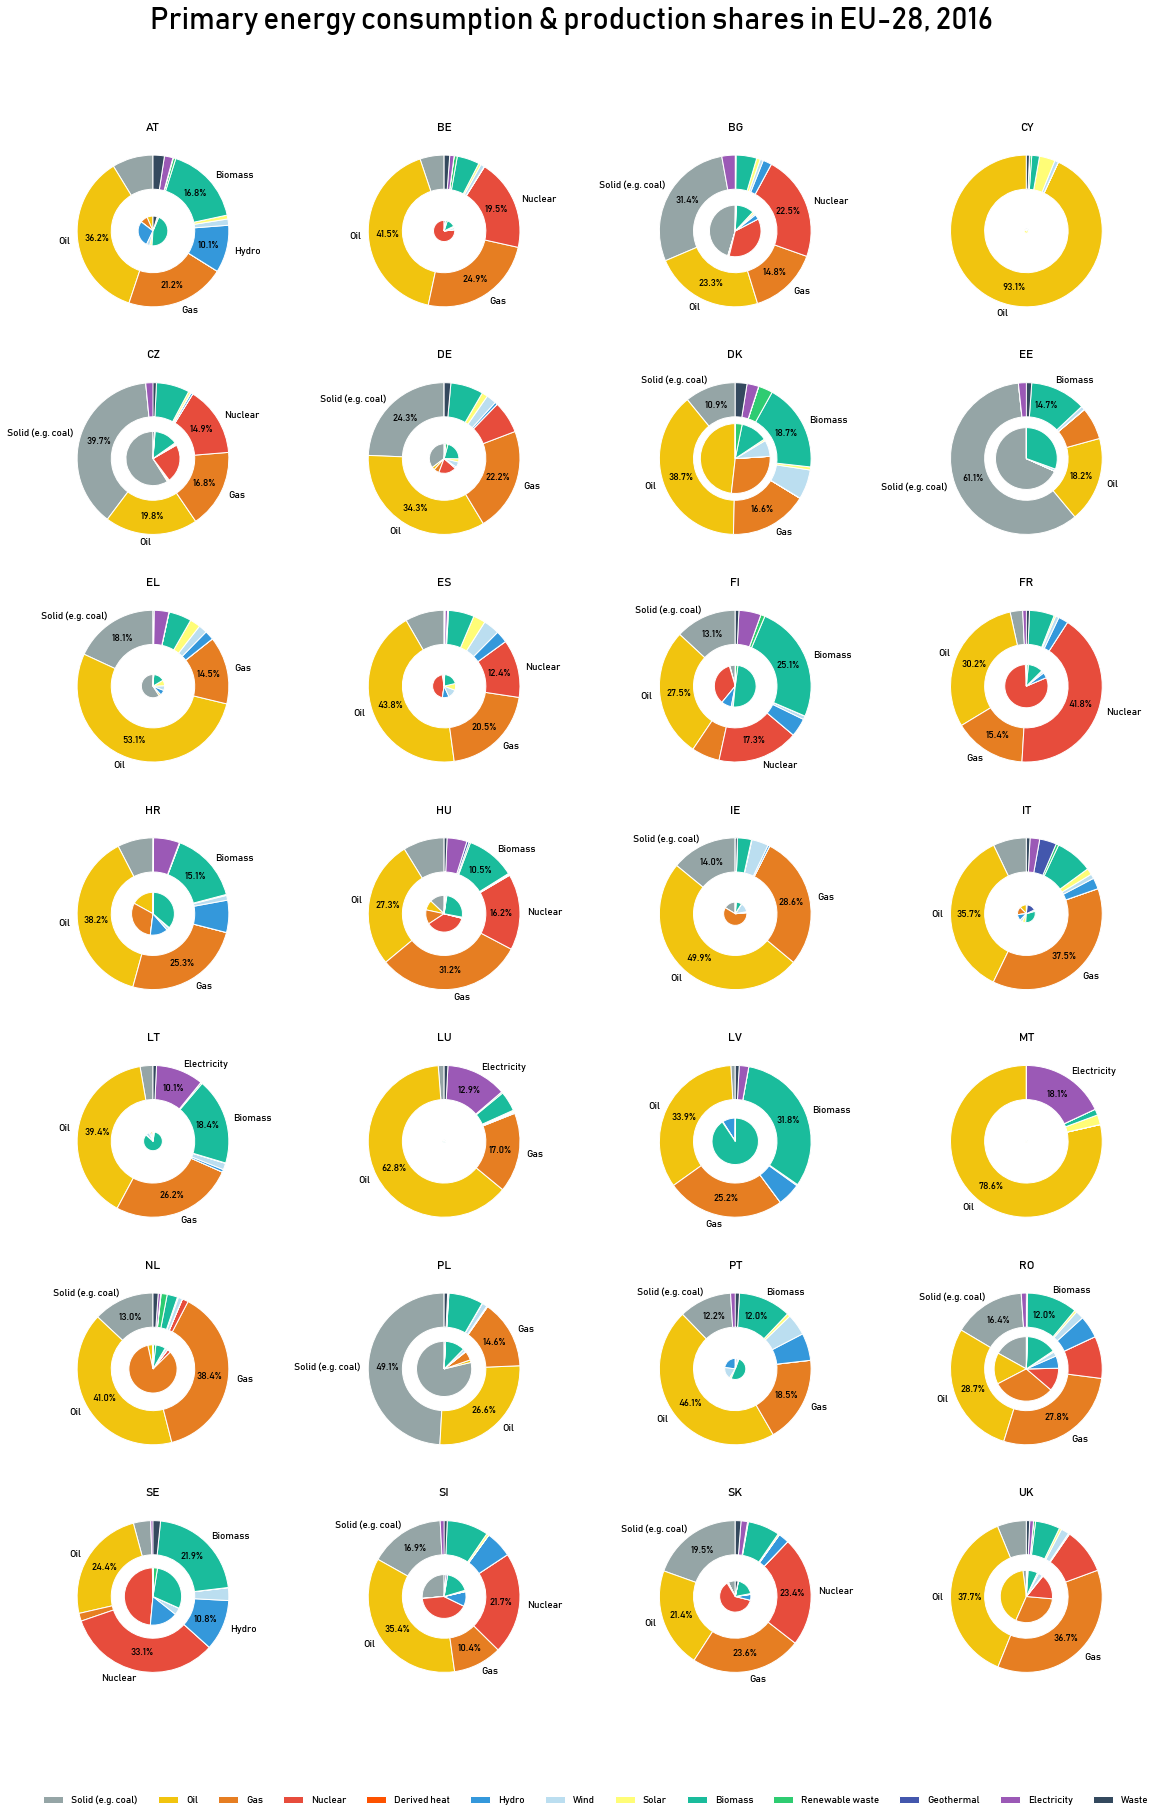

In [15]:
ax[6,1].legend(categories, loc='upper center', bbox_to_anchor=(1.3, -0.5), ncol=len(categories), frameon=False)

fig.suptitle('Primary energy consumption & production shares in EU-28, 2016', fontsize=30)
fig.set_size_inches(20, 30)
fig.savefig('test2png.png', dpi=300)
fig

In [16]:
csv_data = pie_data[['ind','geo','total','cn']]
csv_data.to_csv("primary_production_yearly_EU28_{}.csv".format(year),index=False)